In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import PIL
import os,random
from tensorflow import keras
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
print(tf.__version__)

2.10.0


In [2]:
train_path=pathlib.Path('training_set/training_set')
test_path=pathlib.Path('test_set/test_set/')
train_path

WindowsPath('training_set/training_set')

In [3]:
# Image size
imgh, imgw = 64, 64

In [4]:
# Train
train_ds = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_set = train_ds.flow_from_directory(train_path, target_size=(imgh, imgw), batch_size=32, class_mode='binary')

Found 8005 images belonging to 2 classes.


In [5]:
# Test (Validation)
test_ds = ImageDataGenerator(rescale = 1./255)
test_set = test_ds.flow_from_directory(test_path, target_size=(imgh, imgw), batch_size=32, class_mode='binary')

Found 2023 images belonging to 2 classes.


In [6]:
# Model Creation
model = Sequential()

#STEP 1: ADDING CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(MaxPool2D(pool_size=2, strides=2))
#Adding 2nd Convolutional layer
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))
#Adding 3nd Convolutional layer
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))
#STEP 4: FLATTENING
model.add(Flatten())
#STEP 5: FULL CONNECTION
model.add(Dense(units=128, activation='relu'))
#STEP 6: FULL CONNECTION
model.add(Dense(units=16, activation='relu'))
#STEP 7: OUTPUT LAYER
model.add(Dense(units=1, activation='sigmoid'))

In [7]:
# Summary the Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [8]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/100
50/50 [==============================] - 7s 122ms/step - loss: 0.6940 - accuracy: 0.5156 - val_loss: 0.6921 - val_accuracy: 0.5002
Epoch 2/100
50/50 [==============================] - 6s 120ms/step - loss: 0.6931 - accuracy: 0.5219 - val_loss: 0.6846 - val_accuracy: 0.5492
Epoch 3/100
50/50 [==============================] - 6s 121ms/step - loss: 0.6843 - accuracy: 0.5638 - val_loss: 0.6644 - val_accuracy: 0.6001
Epoch 4/100
50/50 [==============================] - 6s 129ms/step - loss: 0.6867 - accuracy: 0.5494 - val_loss: 0.6794 - val_accuracy: 0.5769
Epoch 5/100
50/50 [==============================] - 6s 120ms/step - loss: 0.6768 - accuracy: 0.5825 - val_loss: 0.6993 - val_accuracy: 0.5566
Epoch 6/100
50/50 [==============================] - 6s 126ms/step - loss: 0.6456 - accuracy: 0.6262 - val_loss: 0.6427 - val_accuracy: 0.6431
Epoch 7/100
50/50 [==============================] - 6s 117ms/step - loss: 0.6406 - accuracy: 0.6475 - val_loss: 0.6102 - val_accuracy: 0.6777

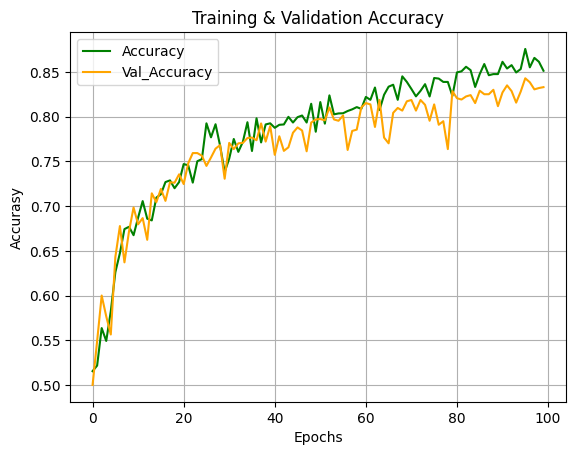

251/251 [==============================] - 13s 52ms/step - loss: 0.2954 - accuracy: 0.8755

Training loss: 0.29535365104675293

Training accuracy: 0.8754528164863586


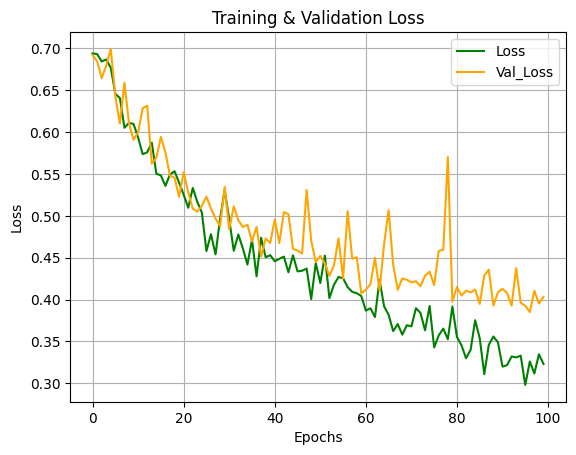

64/64 [==============================] - 2s 31ms/step - loss: 0.4032 - accuracy: 0.8329

Test loss: 0.4031831622123718

Test accuracy: 0.8329213857650757


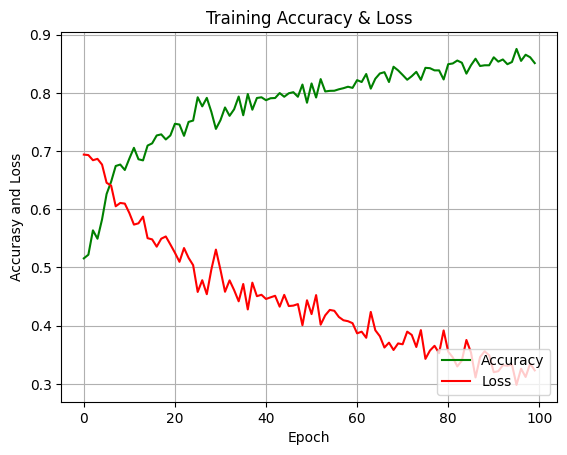

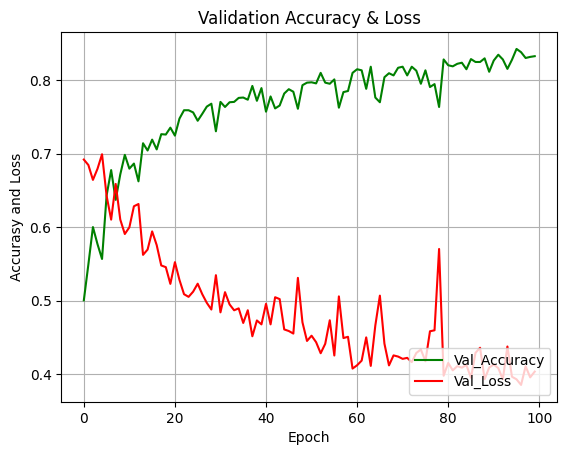

In [9]:
#Training the CNN on the Training set and evaluating it on the Test set
trainHistory = model.fit(x = training_set, validation_data = test_set, epochs = 100, steps_per_epoch=50)
plt.title('Training & Validation Accuracy')
plt.plot(trainHistory.history['accuracy'], 'green',label='Accuracy')
plt.plot(trainHistory.history['val_accuracy'], 'orange',label='Val_Accuracy')
plt.ylabel('Accurasy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.grid()
plt.show()

(loss, accuracy) = model.evaluate(training_set)
print('\nTraining loss:', loss)
print('\nTraining accuracy:', accuracy)

plt.title('Training & Validation Loss')
plt.plot(trainHistory.history['loss'],'green',label='Loss')
plt.plot(trainHistory.history['val_loss'],'orange',label='Val_Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.grid()
plt.show()

(loss, accuracy) = model.evaluate(test_set)
print('\nTest loss:', loss)
print('\nTest accuracy:', accuracy)

plt.plot(trainHistory.history['accuracy'],'green',label='Accuracy')
plt.plot(trainHistory.history['loss'],'red',label='Loss')
plt.title('Training Accuracy & Loss')
plt.ylabel('Accurasy and Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(trainHistory.history['val_accuracy'],'green',label='Val_Accuracy')
plt.plot(trainHistory.history['val_loss'],'red',label='Val_Loss')
plt.title('Validation Accuracy & Loss')
plt.ylabel('Accurasy and Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()

model.save("cat_and_dog1.h5")

In [10]:
model_loaded = keras.models.load_model("cat_and_dog1.h5")

In [11]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

64/64 - 2s - loss: 0.4032 - accuracy: 0.8329 - 2s/epoch - 31ms/step

Test accuracy: 0.8329213857650757

Test loss: 0.4031831622123718


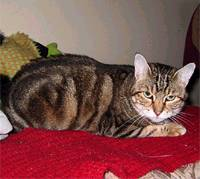

In [12]:
image.load_img('test_set/test_set/cats/cat.4322.jpg')

In [13]:
test_img = image.load_img('test_set/test_set/cats/cat.4322.jpg', target_size = (imgh, imgw))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
test_set.class_indices
if r[0][0] == 1:
    test1 = 'dog'
else:
    test1 = 'cat'
print(f'{test1[np.argmax(r)]}: {100 * np.max(r)}')

1/1 [==============================] - 0s 82ms/step
c: 0.0


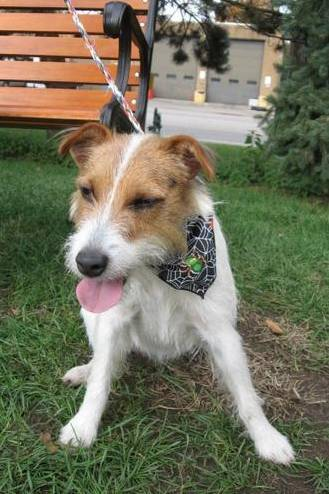

In [14]:
image.load_img('test_set/test_set/dogs/dog.4059.jpg')

In [15]:
test_img = image.load_img('test_set/test_set/dogs/dog.4059.jpg', target_size = (imgh, imgw))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
test_set.class_indices

if r[0][0] == 1:
    test2 = 'dog'
else:
    test2 = 'cat'
print(f'{test2[np.argmax(r)]}: {100 * np.max(r)}')

1/1 [==============================] - 0s 19ms/step
d: 100.0


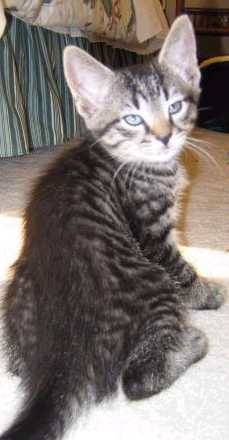

In [16]:
image.load_img('test_set/test_set/cats/cat.4320.jpg')

In [17]:
test_img = image.load_img('test_set/test_set/cats/cat.4320.jpg', target_size = (imgh, imgw))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
test_set.class_indices
if r[0][0] == 1:
    test3 = 'dog'
else:
    test3 = 'cat'
print(f'{test3[np.argmax(r)]}: {100 * np.max(r)}')

1/1 [==============================] - 0s 17ms/step
c: 0.0


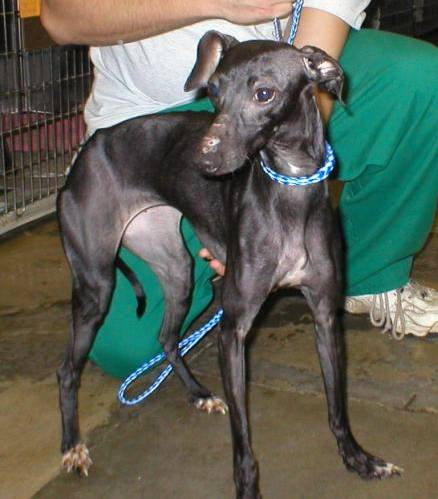

In [18]:
image.load_img('test_set/test_set/dogs/dog.4004.jpg')

In [19]:
test_img = image.load_img('test_set/test_set/dogs/dog.4004.jpg', target_size = (imgh, imgw))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
test_set.class_indices
if r[0][0] == 1:
    test4 = 'dog'
else:
    test4 = 'cat'
print(f'{test4[np.argmax(r)]}: {100 * np.max(r)}')

1/1 [==============================] - 0s 18ms/step
d: 100.0


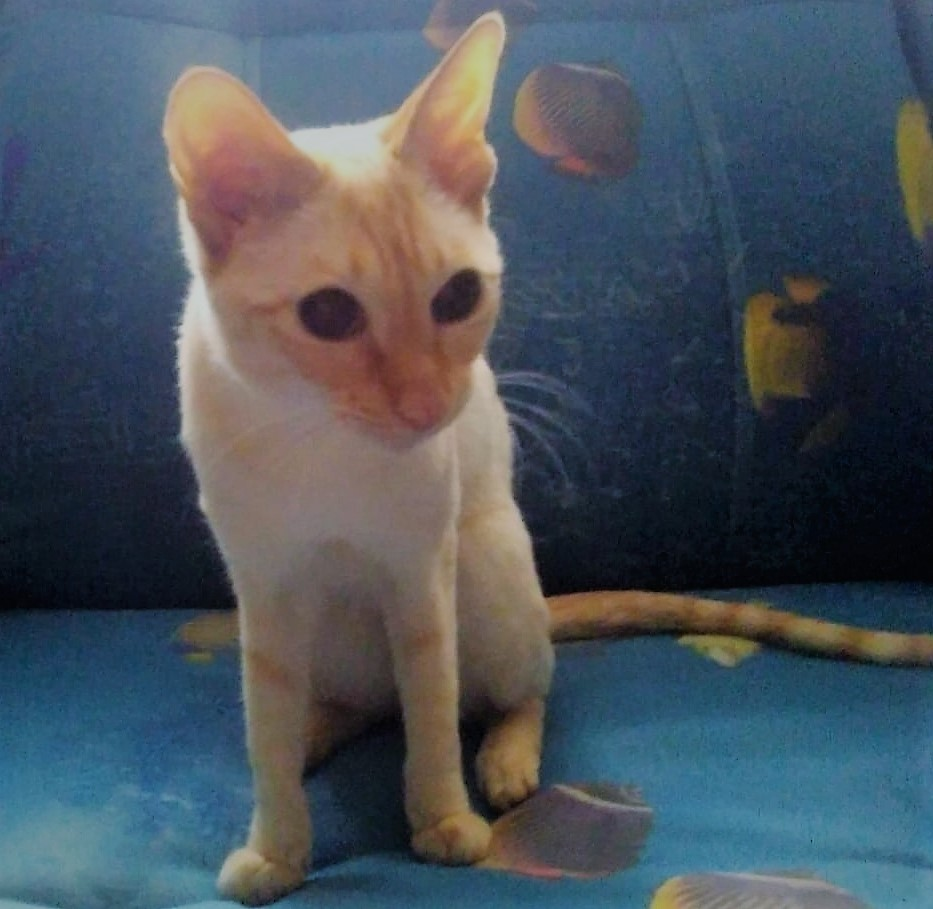

In [20]:
image.load_img('mycat.jpg')

In [21]:
test_img = image.load_img('mycat.jpg', target_size = (imgh, imgw))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
test_set.class_indices
if r[0][0] == 1:
    test5 = 'dog'
else:
    test5 = 'cat'
print(f'{test4[np.argmax(r)]}: {100 * np.max(r)}')

1/1 [==============================] - 0s 19ms/step
d: 100.0


In [22]:
test_img = image.load_img('cattestimg.jpg', target_size = (imgh, imgw))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
test_set.class_indices
if r[0][0] == 1:
    test6 = 'dog'
else:
    test6 = 'cat'
print(f'{test4[np.argmax(r)]}: {100 * np.max(r)}')

1/1 [==============================] - 0s 17ms/step
c: 0.0
